# Vessels opening at Fos per day

## Setup
Install the Signal Ocean SDK:
```
pip install signal-ocean
```
Set your subscription key acquired here: https://apis.signalocean.com/profile

In [1]:
signal_ocean_api_key = '' #replace with your subscription key

## Description
We will generate an analysis over the last 5 days regarding which were opening at Fos and could make it to Ceyhan within a 20 days window

In [2]:
from datetime import date, timedelta,time
from signal_ocean import PortAPI, VesselClassAPI,PortFilter,VesselClassFilter,Connection
from signal_ocean.historical_tonnage_list import VesselFilter, PushType, MarketDeployment, CommercialStatus, VesselSubclass, OperationalStatus
from signal_ocean.historical_tonnage_list import HistoricalTonnageListAPI
from signal_ocean.historical_tonnage_list import IndexLevel

connection = Connection(signal_ocean_api_key)

port_api = PortAPI(connection)
vessel_class_api = VesselClassAPI(connection)
htl_api = HistoricalTonnageListAPI(connection)
vessel_class = vessel_class_api.get_vessel_classes(VesselClassFilter(name_like='aframax'))[0]
port = port_api.get_ports(PortFilter(name_like='Ceyhan'))[0]
laycanEndInDays = 20
start_date = date.today() - timedelta(days=5)
end_date = date.today()

vessel_filter = VesselFilter(
    market_deployments=[MarketDeployment.RELET, MarketDeployment.SPOT],
    vessel_subclass=VesselSubclass.DIRTY,
    commercial_statuses= [CommercialStatus.ON_SUBS],
    latest_ais_since=5
)


htl_for_supply_trend = htl_api.get_historical_tonnage_list(
    port,
    vessel_class,
    laycanEndInDays,
    start_date,
    end_date,
    vessel_filter=vessel_filter,
    time=time(hour=6)
)

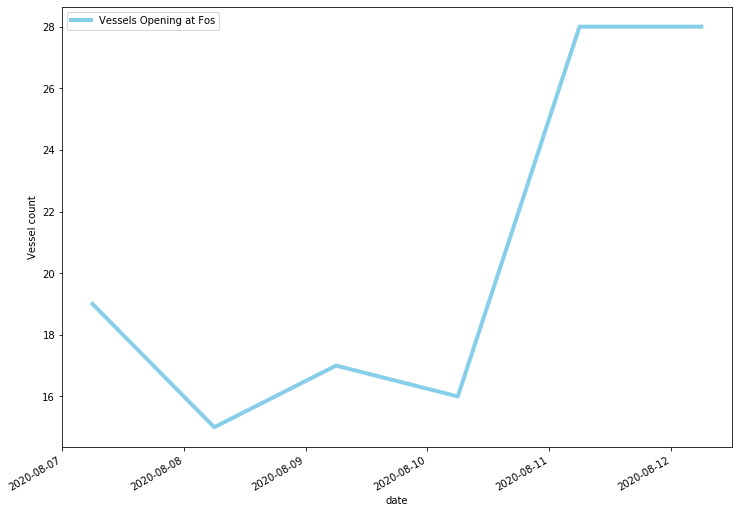

In [3]:
supply_trend_data_frame = htl_for_supply_trend.to_data_frame()
open_ports_of_interest = ['Fos']
open_ports_filter = supply_trend_data_frame.open_port_point_in_time.isin(open_ports_of_interest)
aggregatedData = supply_trend_data_frame.groupby(IndexLevel.DATE, sort=True).size()
ax = aggregatedData.plot(markerfacecolor='blue', color='skyblue', linewidth=4, label='Vessels Opening at Fos', figsize=(12, 9))

ax.set_ylabel('Vessel count')
ax.legend()
